In [6]:

import os
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import selectivesearch
import BMS
import numpy as np
from skimage import morphology
from PIL import Image
import selectivesearch
import file_helper
%matplotlib inline
from PIL import Image

onedrive_user='SzMike'

In [2]:
test_image_dir=r'c:\Users\\'+onedrive_user+'\OneDrive\WISH\TestImages_Praktiker'
image_list_indir=file_helper.imagelist_in_depth(test_image_dir,level=1)
for i,q_im in enumerate(image_list_indir):
    print(str(i)+' : '+q_im)


0 : c:\Users\\SzMike\OneDrive\WISH\TestImages_Praktiker\Alsószekrény, alsószekrény mosdóval\IMG_7143.JPG
1 : c:\Users\\SzMike\OneDrive\WISH\TestImages_Praktiker\Alátét, anya\Csavar_anya1.jpg
2 : c:\Users\\SzMike\OneDrive\WISH\TestImages_Praktiker\Autó ápolás\glass_cleaner_car.jpg
3 : c:\Users\\SzMike\OneDrive\WISH\TestImages_Praktiker\Autófelszerelés, segély\20170414_103420.jpg
4 : c:\Users\\SzMike\OneDrive\WISH\TestImages_Praktiker\Autófelszerelés, segély\benzines_kanna_5l.jpg
5 : c:\Users\\SzMike\OneDrive\WISH\TestImages_Praktiker\Begyűjtó, faszén\2815777_orig.jpg
6 : c:\Users\\SzMike\OneDrive\WISH\TestImages_Praktiker\Beltéri lámpa\20170515_122800.jpg
7 : c:\Users\\SzMike\OneDrive\WISH\TestImages_Praktiker\Beltéri lámpa\asztalilampa.jpg
8 : c:\Users\\SzMike\OneDrive\WISH\TestImages_Praktiker\Beltéri lámpa\IMG_7106.JPG
9 : c:\Users\\SzMike\OneDrive\WISH\TestImages_Praktiker\Beltéri lámpa\IMG_7108.JPG
10 : c:\Users\\SzMike\OneDrive\WISH\TestImages_Praktiker\Beltéri lámpa\IMG_7109.JPG


In [3]:
image_file=image_list_indir[1]

query_im=Image.open(image_file)

query_im.thumbnail((300,300))
img = np.array(query_im)

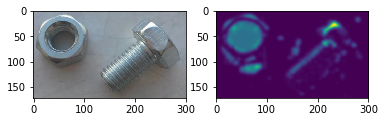

In [4]:
sm=BMS.compute_saliency(img)
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(img)
ax2 = fig.add_subplot(122)
ax2.imshow(sm)

SELECTIVE SEARCH

In [5]:
simg, bb= selectivesearch.selective_search(img, scale=200.0, sigma=1.2, min_size=100)
        

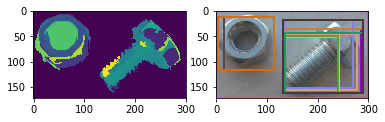

In [19]:
f, axarr = plt.subplots(1,2)

axarr[0].imshow(simg[:,:,3])

(h,w,d)=img.shape

l_bbox=[]

axarr[1].imshow(img)

for box in bb:
    rcoords=box['rect']
    if rcoords[2]*rcoords[3]>100*100:
        sal_mean=np.max(sm[rcoords[1]:rcoords[1]+rcoords[3],sm[rcoords[0]:rcoords[0]+rcoords[2]]])
        if sal_mean>8:
            axarr[1].add_patch(
                patches.Rectangle(
                    (rcoords[0], rcoords[1]),
                    rcoords[2],
                    rcoords[3],
                    fill=False,      # remove background
                    linewidth=2,edgecolor=(np.random.rand(),np.random.rand(),np.random.rand()),facecolor='none'
                )
                )    
            l_bbox.append(box)